In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import math 
from sklearn.preprocessing import LabelEncoder
import shap

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [3]:
#Reading the Dataset
new_data=pd.read_csv('/Users/gopaljee45/Desktop/codinG/SA_2025/Default_Loan_Prediction/Data/accepted_2007_to_2018Q4.csv.gz',low_memory=False)

In [4]:
new_data.shape

(2260701, 151)

In [5]:
#Response/Target Variable 

new_data.loan_status.value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [6]:
#Considering only Fully Paid, Default, Charged Off Loans.
resp=['Current']
Loan_Main = new_data[~new_data['loan_status'].isin(resp)] 
Loan_Main["loan_status"] = np.where(Loan_Main["loan_status"].str.contains("Fully"), 0, 1)

#New Dataset shape
Loan_Main.shape

# Changing employee length to numerical.
Loan_Main['emp_length'].fillna("< 1 year",inplace= True)
dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0.5, '2 years':2,'9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
Loan_Main['emp_length'].replace(dict_emp_length, inplace=True)

#Seperating Loan_Main dataset into two based on Application_Type (Individual / Joint Type)
grouped = Loan_Main.groupby(Loan_Main.application_type)
Individual_Loan=grouped.get_group("Individual")
Joint_Loan=grouped.get_group("Joint App")

/var/folders/j4/0m076ffd2ld5t47kpqtgyx5w0000gn/T/ipykernel_20711/2826462374.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan_Main['emp_length'].fillna("< 1 year",inplace= True)
/var/folders/j4/0m076ffd2ld5t47kpqtgyx5w0000gn/T/ipykernel_20711/2826462374.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [7]:
Individual_Loan.shape, Joint_Loan.shape

((1352767, 151), (29584, 151))

In [8]:
# Changing purpose into numerical using labelencoder
col=['purpose']
enc= LabelEncoder()
Individual_Loan.loc[:,col]= Individual_Loan.loc[:,col].apply(enc.fit_transform)

/var/folders/j4/0m076ffd2ld5t47kpqtgyx5w0000gn/T/ipykernel_20711/2623262380.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Individual_Loan['issue_d'] = pd.to_datetime(Individual_Loan['issue_d'])


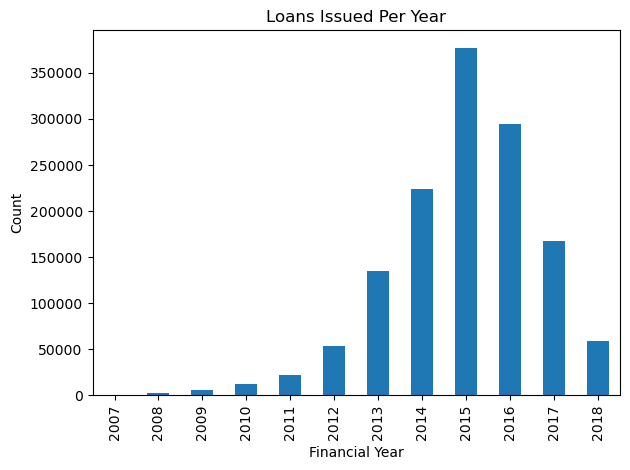

In [9]:
#Loan Issued over the years 

Individual_Loan['issue_d'] = pd.to_datetime(Individual_Loan['issue_d'])

Individual_Loan['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [10]:
#set fraction
frac = 0.85
#get fractions and make deep copy
df_train = Individual_Loan.loc[Individual_Loan['issue_d']  < Individual_Loan['issue_d'].quantile(frac)]
df_test =  Individual_Loan.loc[Individual_Loan['issue_d'] >= Individual_Loan['issue_d'].quantile(frac)]

In [11]:
#save as compressed zipped files to save space
df_test.to_csv('/Users/gopaljee45/Desktop/codinG/SA_2025/Default_Loan_Prediction/Data/df_test.csv.zip')
df_train.to_csv('/Users/gopaljee45/Desktop/codinG/SA_2025/Default_Loan_Prediction/Data/df_train.csv.zip')

In [12]:
df_train.shape,df_test.shape

((1143145, 151), (209622, 151))